# Business Problem

Problem Context
Predict the number of offenses for a given precinct within the next three months,based on historical crime data of the New York Police Department (NYPD) by using Negative Binomial Regression

Content
The dataset covers the data of all crimes reported to the New York Police Department from 2006 to the end of last year i.e.,2019. This is a large dataset consisting of 6.98 million records with 35 attributes.Given, the large size, we could filter data to a more manageable size and per our project requirement.

####Features#####

	#cmplnt_num        - randomly generated complaint number              
	#cmplnt_fr_dt      - exact date of crime occurance         
	#cmplnt_fr_tm      - exact time of crime occurance          
	#addr_pct_cd       - precinct in which the incident occured                  
	#ofns_desc         - Offense description                           
	#crm_atpt_cptd_cd  - Indicator of whether crime was successfully completed or attempted    
	#law_cat_cd        - Level of offense: felony, misdemeanor, violation     
	#boro_nm           - The name of the borough in which the incident occurred       
	#loc_of_occur_desc - Location of crime occurence      
	#prem_typ_desc     - Description of premises    
	#juris_desc        - Description of jurisdiction code   
	#jurisdiction_code - Jurisdiction responsible for incident.   
	#susp_age_group    - Suspect’s Age Group   
	#susp_race         - Suspect’s Race Description    
	#susp_sex          - Suspect’s Sex Description    
	#patrol_boro       - Name of the patrol borough in which crime occurred   
	#vic_age_group     - Victim’s Age Group      
	#vic_race          - Victim's Race Description    
	#vic_sex           - Victim's Sex Description      
	#cmplnt_to_dt      - End Date of Crime Occurence  
	#cmplnt_to_tm      - End Time of Crime Occurence

In [1]:
import datetime
import sklearn
import numpy as np
import seaborn as sns
from math import sqrt
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
# import warnings
# warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
# to split train and test set
from sklearn.model_selection import train_test_split
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import os
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

#Reandom forest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
pip install pandas

In [3]:
pip install sodapy

# Data Preparation

In [4]:
import pandas as pd
from sodapy import Socrata

# Extracting data using API
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
## domain = "https://data.cityofnewyork.us/resource/qgea-i56i.json"
## client = Socrata(domain, None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
## results = client.get("qgea-i56i",limit=10000)

#----------------------------------------------------------------------------
# Loading data from CSV 
# importing csv module 
import csv 

# csv file name 
file = pd.read_csv("NYPD.csv", low_memory = False)

In [5]:
# results_df.describe()

In [6]:
file.head

<bound method NDFrame.head of        CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0       708078702    5/20/2017      4:02:00    5/20/2017      4:09:00   
1       696394455    5/12/2017      7:14:00          NaN          NaN   
2       430798229   10/16/2007      2:00:00   12/31/2007      3:00:00   
3       722182197    12/4/2014      0:30:00          NaN          NaN   
4       907474278     6/4/2017     10:00:00     6/5/2017     10:00:00   
...           ...          ...          ...          ...          ...   
59994   331933147     8/4/2012      2:47:00          NaN          NaN   
59995   788712882   12/27/2012     12:10:00          NaN          NaN   
59996   465850600    6/14/2015     17:00:00    6/14/2015     17:02:00   
59997   203855141    3/25/2014      7:03:00    3/25/2014      7:05:00   
59998   594111384     2/5/2012      5:00:00     2/5/2012      5:05:00   

       ADDR_PCT_CD      RPT_DT  KY_CD                        OFNS_DESC  PD_CD  \
0           

In [7]:
file.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
PARKS_NM              object
HADEVELOPT            object
HOUSING_PSA          float64
X_COORD_CD           float64
Y_COORD_CD           float64
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
STATION_NAME          object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX       

In [8]:
file.shape

(59999, 35)

In [9]:
file.isnull().sum()

CMPLNT_NUM               0
CMPLNT_FR_DT             1
CMPLNT_FR_TM             0
CMPLNT_TO_DT         13267
CMPLNT_TO_TM         13244
ADDR_PCT_CD             10
RPT_DT                   0
KY_CD                    0
OFNS_DESC               25
PD_CD                  141
PD_DESC                141
CRM_ATPT_CPTD_CD         0
LAW_CAT_CD               0
BORO_NM                142
LOC_OF_OCCUR_DESC     6841
PREM_TYP_DESC          295
JURIS_DESC               0
JURISDICTION_CODE      141
PARKS_NM             59740
HADEVELOPT           55125
HOUSING_PSA          52836
X_COORD_CD              23
Y_COORD_CD              23
SUSP_AGE_GROUP           0
SUSP_RACE                0
SUSP_SEX                 0
TRANSIT_DISTRICT     59270
Latitude                23
Longitude               23
Lat_Lon                 23
PATROL_BORO            143
STATION_NAME         59270
VIC_AGE_GROUP            0
VIC_RACE                 0
VIC_SEX                  0
dtype: int64

# Data Transformation

In [10]:
df1 = file.drop(['CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'Lat_Lon', 'PARKS_NM', 'TRANSIT_DISTRICT', 'STATION_NAME','HADEVELOPT','PD_CD','PD_DESC','BORO_NM','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','HOUSING_PSA','X_COORD_CD','Y_COORD_CD','Latitude','Longitude'],axis=1)

In [11]:
df1.shape

(59999, 17)

In [12]:
df1.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
JURISDICTION_CODE    float64
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
PATROL_BORO           object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
dtype: object

In [13]:
df1.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_TM           0
ADDR_PCT_CD           10
RPT_DT                 0
KY_CD                  0
OFNS_DESC             25
CRM_ATPT_CPTD_CD       0
LAW_CAT_CD             0
JURIS_DESC             0
JURISDICTION_CODE    141
SUSP_AGE_GROUP         0
SUSP_RACE              0
SUSP_SEX               0
PATROL_BORO          143
VIC_AGE_GROUP          0
VIC_RACE               0
VIC_SEX                0
dtype: int64

In [14]:
df2 = df1.dropna(subset=['ADDR_PCT_CD'])

In [15]:
df2.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_TM           0
ADDR_PCT_CD            0
RPT_DT                 0
KY_CD                  0
OFNS_DESC             25
CRM_ATPT_CPTD_CD       0
LAW_CAT_CD             0
JURIS_DESC             0
JURISDICTION_CODE    131
SUSP_AGE_GROUP         0
SUSP_RACE              0
SUSP_SEX               0
PATROL_BORO          133
VIC_AGE_GROUP          0
VIC_RACE               0
VIC_SEX                0
dtype: int64

In [16]:
offense_dict = dict(zip(df2['KY_CD'],df2['OFNS_DESC']))
offense_dict

{344: 'ASSAULT 3 & RELATED OFFENSES',
 101: 'MURDER & NON-NEGL. MANSLAUGHTER',
 116: 'SEX CRIMES',
 351: 'CRIMINAL MISCHIEF & RELATED OF',
 109: 'GRAND LARCENY',
 578: 'HARRASSMENT 2',
 106: 'FELONY ASSAULT',
 126: 'MISCELLANEOUS PENAL LAW',
 359: 'OFFENSES AGAINST PUBLIC ADMINI',
 343: 'OTHER OFFENSES RELATED TO THEF',
 361: 'OFF. AGNST PUB ORD SENSBLTY &',
 107: 'BURGLARY',
 105: 'ROBBERY',
 358: 'OFFENSES INVOLVING FRAUD',
 353: 'UNAUTHORIZED USE OF A VEHICLE',
 341: 'PETIT LARCENY',
 348: 'VEHICLE AND TRAFFIC LAWS',
 104: 'RAPE',
 233: 'SEX CRIMES',
 111: 'POSSESSION OF STOLEN PROPERTY',
 121: 'CRIMINAL MISCHIEF & RELATED OF',
 352: 'CRIMINAL TRESPASS',
 124: 'KIDNAPPING & RELATED OFFENSES',
 236: 'DANGEROUS WEAPONS',
 113: 'FORGERY',
 347: 'INTOXICATED & IMPAIRED DRIVING',
 125: 'NYS LAWS-UNCLASSIFIED FELONY',
 232: 'POSSESSION OF STOLEN PROPERTY',
 365: 'ADMINISTRATIVE CODE',
 110: 'GRAND LARCENY OF MOTOR VEHICLE',
 340: 'FRAUDS',
 118: 'DANGEROUS WEAPONS',
 112: 'THEFT-FRAUD',
 

In [17]:
df2.loc[df2['OFNS_DESC'].isnull(),'OFNS_DESC'] = df2['KY_CD'].map(offense_dict)

C:\Users\akhil\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
df2.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_TM           0
ADDR_PCT_CD            0
RPT_DT                 0
KY_CD                  0
OFNS_DESC             25
CRM_ATPT_CPTD_CD       0
LAW_CAT_CD             0
JURIS_DESC             0
JURISDICTION_CODE    131
SUSP_AGE_GROUP         0
SUSP_RACE              0
SUSP_SEX               0
PATROL_BORO          133
VIC_AGE_GROUP          0
VIC_RACE               0
VIC_SEX                0
dtype: int64

In [19]:
df2.KY_CD[df2['OFNS_DESC'].isnull()]

2371     360
3417     360
6911     360
10675    360
10684    360
14912    360
16234    360
17297    360
20825    360
21401    360
21566    360
24264    360
24337    360
29020    360
30943    360
32659    360
32846    360
34444    360
44620    360
46618    360
48474    360
52685    360
54287    360
57040    360
58812    360
Name: KY_CD, dtype: int64

In [20]:
df2 = df2[df2['KY_CD'] != 360]

In [21]:
juris_dict = dict(zip(df2['JURIS_DESC'],df2['JURISDICTION_CODE']))

In [22]:
df2.loc[df2["JURISDICTION_CODE"].isnull(),"JURISDICTION_CODE"] = df2["JURIS_DESC"].map(juris_dict)

In [23]:
df2.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_TM           0
ADDR_PCT_CD            0
RPT_DT                 0
KY_CD                  0
OFNS_DESC              0
CRM_ATPT_CPTD_CD       0
LAW_CAT_CD             0
JURIS_DESC             0
JURISDICTION_CODE      0
SUSP_AGE_GROUP         0
SUSP_RACE              0
SUSP_SEX               0
PATROL_BORO          133
VIC_AGE_GROUP          0
VIC_RACE               0
VIC_SEX                0
dtype: int64

In [24]:
df2 = df2.dropna()

In [25]:
df2.isnull().sum()

CMPLNT_NUM           0
CMPLNT_FR_TM         0
ADDR_PCT_CD          0
RPT_DT               0
KY_CD                0
OFNS_DESC            0
CRM_ATPT_CPTD_CD     0
LAW_CAT_CD           0
JURIS_DESC           0
JURISDICTION_CODE    0
SUSP_AGE_GROUP       0
SUSP_RACE            0
SUSP_SEX             0
PATROL_BORO          0
VIC_AGE_GROUP        0
VIC_RACE             0
VIC_SEX              0
dtype: int64

In [26]:
df2.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
JURISDICTION_CODE    float64
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
PATROL_BORO           object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
dtype: object

In [27]:
df2.shape

(59831, 17)

In [28]:
df2['RPT_DT'] = pd.to_datetime(df2['RPT_DT'])
df2['CMPLNT_FR_TM'] = pd.to_datetime(df2['CMPLNT_FR_TM'])

In [29]:
df2['year_of_occurance'] = df2['RPT_DT'].dt.year
df2['month_of_occurance'] = df2['RPT_DT'].dt.month
df2['day_of_week'] = df2['RPT_DT'].dt.day_name()

In [30]:
df2.isnull().sum()

CMPLNT_NUM            0
CMPLNT_FR_TM          0
ADDR_PCT_CD           0
RPT_DT                0
KY_CD                 0
OFNS_DESC             0
CRM_ATPT_CPTD_CD      0
LAW_CAT_CD            0
JURIS_DESC            0
JURISDICTION_CODE     0
SUSP_AGE_GROUP        0
SUSP_RACE             0
SUSP_SEX              0
PATROL_BORO           0
VIC_AGE_GROUP         0
VIC_RACE              0
VIC_SEX               0
year_of_occurance     0
month_of_occurance    0
day_of_week           0
dtype: int64

In [31]:
df2.shape

(59831, 20)

In [32]:
df2.head

<bound method NDFrame.head of        CMPLNT_NUM        CMPLNT_FR_TM  ADDR_PCT_CD     RPT_DT  KY_CD  \
0       708078702 2020-11-10 04:02:00        109.0 2017-05-20    344   
2       430798229 2020-11-10 02:00:00         83.0 2016-03-11    116   
3       722182197 2020-11-10 00:30:00         23.0 2014-12-04    351   
4       907474278 2020-11-10 10:00:00        106.0 2017-06-12    109   
5       288889108 2020-11-10 01:30:00         68.0 2016-09-27    578   
...           ...                 ...          ...        ...    ...   
59994   331933147 2020-11-10 02:47:00         75.0 2012-08-04    106   
59995   788712882 2020-11-10 12:10:00         25.0 2012-12-27    578   
59996   465850600 2020-11-10 17:00:00         69.0 2015-06-14    106   
59997   203855141 2020-11-10 07:03:00        106.0 2014-03-25    578   
59998   594111384 2020-11-10 05:00:00         43.0 2014-07-25    233   

                            OFNS_DESC CRM_ATPT_CPTD_CD   LAW_CAT_CD  \
0        ASSAULT 3 & RELATED OFFEN

In [33]:
df2['daytype'] = np.where(((df2['RPT_DT']).dt.dayofweek) < 5,"weekday","weekend")
df2['daytype']

0        weekend
2        weekday
3        weekday
4        weekday
5        weekday
          ...   
59994    weekend
59995    weekday
59996    weekend
59997    weekday
59998    weekday
Name: daytype, Length: 59831, dtype: object

In [34]:
df2.dtypes

CMPLNT_NUM                     int64
CMPLNT_FR_TM          datetime64[ns]
ADDR_PCT_CD                  float64
RPT_DT                datetime64[ns]
KY_CD                          int64
OFNS_DESC                     object
CRM_ATPT_CPTD_CD              object
LAW_CAT_CD                    object
JURIS_DESC                    object
JURISDICTION_CODE            float64
SUSP_AGE_GROUP                object
SUSP_RACE                     object
SUSP_SEX                      object
PATROL_BORO                   object
VIC_AGE_GROUP                 object
VIC_RACE                      object
VIC_SEX                       object
year_of_occurance              int64
month_of_occurance             int64
day_of_week                   object
daytype                       object
dtype: object

In [35]:
df3 = df2.copy()

In [36]:
col = df3.select_dtypes(exclude='datetime').columns.to_list()
df3[col]=df3[col].astype('category')
df3.dtypes

CMPLNT_NUM                  category
CMPLNT_FR_TM          datetime64[ns]
ADDR_PCT_CD                 category
RPT_DT                datetime64[ns]
KY_CD                       category
OFNS_DESC                   category
CRM_ATPT_CPTD_CD            category
LAW_CAT_CD                  category
JURIS_DESC                  category
JURISDICTION_CODE           category
SUSP_AGE_GROUP              category
SUSP_RACE                   category
SUSP_SEX                    category
PATROL_BORO                 category
VIC_AGE_GROUP               category
VIC_RACE                    category
VIC_SEX                     category
year_of_occurance           category
month_of_occurance          category
day_of_week                 category
daytype                     category
dtype: object

In [37]:
# df3['rpt_dt'] = df3['rpt_dt'].fillna(value=df3["rpt_dt"].mode())

In [38]:
#df3['ofns_desc'].fillna(df3['ofns_desc'].mode()[0], inplace=True)

In [39]:
#df3['ky_cd'].fillna(df3['ky_cd'].mode()[0], inplace=True)

In [40]:
#df3['pd_cd'].fillna(df3['pd_cd'].mode()[0], inplace=True)

In [41]:
#df3['jurisdiction_code'].fillna(df3['jurisdiction_code'].mode()[0], inplace=True)

In [42]:
#df3['pd_desc'].fillna(df3['pd_desc'].mode()[0], inplace=True)

In [43]:
#df3['boro_nm'].fillna(df3['boro_nm'].mode()[0], inplace=True)

In [44]:
#df3['loc_of_occur_desc'].fillna(df3['loc_of_occur_desc'].mode()[0], inplace=True)

In [45]:
#df3['prem_typ_desc'].fillna(df3['prem_typ_desc'].mode()[0], inplace=True)

In [46]:
#df3['susp_age_group'].fillna(df3['susp_age_group'].mode()[0], inplace=True)

In [47]:
#df3['susp_race'].fillna(df3['susp_race'].mode()[0], inplace=True)

In [48]:
#df3['susp_sex'].fillna(df3['susp_sex'].mode()[0], inplace=True)

In [49]:
#df3['patrol_boro'].fillna(df3['patrol_boro'].mode()[0], inplace=True)

In [50]:
#df3['vic_age_group'].fillna(df3['vic_age_group'].mode()[0], inplace=True)

In [51]:
#labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
#df3['precinct'] = labelencoder.fit_transform(df3['addr_pct_cd'])
#print(df3)

## Calculate Number of crimes by precinct

In [38]:
tb1 = df3.groupby('ADDR_PCT_CD')['RPT_DT'].apply(lambda x: x.sort_values(ascending = False))
tb1

ADDR_PCT_CD       
1.0          26324   2017-12-28
             49743   2017-12-25
             16703   2017-12-17
             15593   2017-12-16
             38255   2017-12-13
                        ...    
123.0        32523   2011-02-12
             54151   2011-02-05
             33408   2011-02-05
             55698   2011-02-01
             22095   2011-01-19
Name: RPT_DT, Length: 59831, dtype: datetime64[ns]

In [39]:
tb1 = df3.groupby(['ADDR_PCT_CD','RPT_DT'])['CMPLNT_NUM'].agg(['count']).sort_values('RPT_DT').reset_index(level=0)
tb1.reset_index(level=0, inplace=True)
df4 = pd.merge(tb1, df3,  how='right', left_on=['ADDR_PCT_CD','RPT_DT'], right_on = ['ADDR_PCT_CD','RPT_DT'])
df4

,RPT_DT,ADDR_PCT_CD,count,CMPLNT_NUM,CMPLNT_FR_TM,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,...,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year_of_occurance,month_of_occurance,day_of_week,daytype
0,2006-04-18,113.0,1,476555488,2020-11-10 13:00:00,578,HARRASSMENT 2,ATTEMPTED,VIOLATION,N.Y. POLICE DEPT,...,BLACK,M,PATROL BORO QUEENS SOUTH,25-44,BLACK,F,2006,4,Tuesday,weekday
1,2006-04-19,105.0,1,482185331,2020-11-10 08:35:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,BLACK,M,PATROL BORO QUEENS SOUTH,25-44,WHITE,M,2006,4,Wednesday,weekday
2,2006-04-20,44.0,1,421451064,2020-11-10 12:50:00,578,HARRASSMENT 2,COMPLETED,VIOLATION,N.Y. POLICE DEPT,...,BLACK,F,PATROL BORO BRONX,45-64,BLACK,F,2006,4,Thursday,weekday
3,2006-04-21,69.0,1,730104949,2020-11-10 14:53:00,578,HARRASSMENT 2,COMPLETED,VIOLATION,N.Y. POLICE DEPT,...,BLACK,M,PATROL BORO BKLYN SOUTH,65+,BLACK,F,2006,4,Friday,weekday
4,2006-04-22,113.0,1,594816332,2020-11-10 16:10:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,BLACK,M,PATROL BORO QUEENS SOUTH,18-24,BLACK,F,2006,4,Saturday,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59826,2019-02-17,67.0,1,810533252,2020-11-10 21:40:00,578,HARRASSMENT 2,COMPLETED,VIOLATION,N.Y. POLICE DEPT,...,BLACK,F,PATROL BORO BKLYN SOUTH,25-44,BLACK,F,2019,2,Sunday,weekend
59827,2019-03-18,45.0,1,995833483,2020-11-10 15:00:00,116,SEX CRIMES,COMPLETED,FELONY,N.Y. POLICE DEPT,...,WHITE HISPANIC,M,PATROL BORO BRONX,<18,WHITE HISPANIC,F,2019,3,Monday,weekday
59828,2019-03-18,66.0,1,166879036,2020-11-10 00:01:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,UNKNOWN,M,PATROL BORO BKLYN SOUTH,18-24,UNKNOWN,F,2019,3,Monday,weekday
59829,2019-04-08,121.0,1,327146009,2020-11-10 14:00:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,BLACK,M,PATROL BORO STATEN ISLAND,25-44,BLACK,F,2019,4,Monday,weekday


In [40]:
df4['time_diff'] = df4.sort_values(['ADDR_PCT_CD','RPT_DT']).groupby('ADDR_PCT_CD')['RPT_DT'].diff()
df4 = df4.dropna(subset=['time_diff'])
df4.shape

(59754, 23)

In [41]:
df4.isnull().sum()

RPT_DT                0
ADDR_PCT_CD           0
count                 0
CMPLNT_NUM            0
CMPLNT_FR_TM          0
KY_CD                 0
OFNS_DESC             0
CRM_ATPT_CPTD_CD      0
LAW_CAT_CD            0
JURIS_DESC            0
JURISDICTION_CODE     0
SUSP_AGE_GROUP        0
SUSP_RACE             0
SUSP_SEX              0
PATROL_BORO           0
VIC_AGE_GROUP         0
VIC_RACE              0
VIC_SEX               0
year_of_occurance     0
month_of_occurance    0
day_of_week           0
daytype               0
time_diff             0
dtype: int64

In [42]:
df4.dtypes

RPT_DT                 datetime64[ns]
ADDR_PCT_CD                  category
count                           int64
CMPLNT_NUM                   category
CMPLNT_FR_TM           datetime64[ns]
KY_CD                        category
OFNS_DESC                    category
CRM_ATPT_CPTD_CD             category
LAW_CAT_CD                   category
JURIS_DESC                   category
JURISDICTION_CODE            category
SUSP_AGE_GROUP               category
SUSP_RACE                    category
SUSP_SEX                     category
PATROL_BORO                  category
VIC_AGE_GROUP                category
VIC_RACE                     category
VIC_SEX                      category
year_of_occurance            category
month_of_occurance           category
day_of_week                  category
daytype                      category
time_diff             timedelta64[ns]
dtype: object

In [43]:
df4['time_diff'] = df4['time_diff'].astype('timedelta64[D]').astype(int)

<ipython-input-43-0d871a66f484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['time_diff'] = df4['time_diff'].astype('timedelta64[D]').astype(int)


In [44]:
df4.dtypes

RPT_DT                datetime64[ns]
ADDR_PCT_CD                 category
count                          int64
CMPLNT_NUM                  category
CMPLNT_FR_TM          datetime64[ns]
KY_CD                       category
OFNS_DESC                   category
CRM_ATPT_CPTD_CD            category
LAW_CAT_CD                  category
JURIS_DESC                  category
JURISDICTION_CODE           category
SUSP_AGE_GROUP              category
SUSP_RACE                   category
SUSP_SEX                    category
PATROL_BORO                 category
VIC_AGE_GROUP               category
VIC_RACE                    category
VIC_SEX                     category
year_of_occurance           category
month_of_occurance          category
day_of_week                 category
daytype                     category
time_diff                      int32
dtype: object

In [45]:
df4[df4['time_diff']>90]

,RPT_DT,ADDR_PCT_CD,count,CMPLNT_NUM,CMPLNT_FR_TM,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,...,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year_of_occurance,month_of_occurance,day_of_week,daytype,time_diff
14,2011-01-01,69.0,1,994720437,2020-11-10 10:00:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,...,M,PATROL BORO BKLYN SOUTH,25-44,BLACK,F,2011,1,Saturday,weekend,1716
15,2011-01-01,105.0,2,484630801,2020-11-10 16:00:00,106,FELONY ASSAULT,ATTEMPTED,FELONY,N.Y. POLICE DEPT,...,M,PATROL BORO QUEENS SOUTH,45-64,BLACK,F,2011,1,Saturday,weekend,1718
19,2011-01-01,42.0,1,284102197,2020-11-10 06:00:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,M,PATROL BORO BRONX,25-44,BLACK,F,2011,1,Saturday,weekend,1710
23,2011-01-01,103.0,1,146619360,2020-11-10 05:45:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,M,PATROL BORO QUEENS SOUTH,18-24,WHITE HISPANIC,F,2011,1,Saturday,weekend,1707
29,2011-01-01,113.0,1,754895381,2020-11-10 13:00:00,351,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,M,PATROL BORO QUEENS SOUTH,25-44,BLACK,F,2011,1,Saturday,weekend,1715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59824,2019-02-02,47.0,1,919443939,2020-11-10 00:00:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,M,PATROL BORO BRONX,<18,BLACK,F,2019,2,Saturday,weekend,398
59825,2019-02-08,63.0,1,324070938,2020-11-10 06:00:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,M,PATROL BORO BKLYN SOUTH,25-44,BLACK,F,2019,2,Friday,weekday,405
59827,2019-03-18,45.0,1,995833483,2020-11-10 15:00:00,116,SEX CRIMES,COMPLETED,FELONY,N.Y. POLICE DEPT,...,M,PATROL BORO BRONX,<18,WHITE HISPANIC,F,2019,3,Monday,weekday,442
59828,2019-03-18,66.0,1,166879036,2020-11-10 00:01:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,M,PATROL BORO BKLYN SOUTH,18-24,UNKNOWN,F,2019,3,Monday,weekday,445


In [46]:
df4['target'] = np.where(df4['time_diff'] >1, 0, 1)
df4['target']

<ipython-input-46-48b0c1985c80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['target'] = np.where(df4['time_diff'] >1, 0, 1)


4        0
14       0
15       0
16       1
19       0
        ..
59826    0
59827    0
59828    0
59829    0
59830    0
Name: target, Length: 59754, dtype: int32

In [47]:
df4['target'] = df4['target'].astype('category')

<ipython-input-47-029a6d3c159c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['target'] = df4['target'].astype('category')


In [48]:
df4.dtypes

RPT_DT                datetime64[ns]
ADDR_PCT_CD                 category
count                          int64
CMPLNT_NUM                  category
CMPLNT_FR_TM          datetime64[ns]
KY_CD                       category
OFNS_DESC                   category
CRM_ATPT_CPTD_CD            category
LAW_CAT_CD                  category
JURIS_DESC                  category
JURISDICTION_CODE           category
SUSP_AGE_GROUP              category
SUSP_RACE                   category
SUSP_SEX                    category
PATROL_BORO                 category
VIC_AGE_GROUP               category
VIC_RACE                    category
VIC_SEX                     category
year_of_occurance           category
month_of_occurance          category
day_of_week                 category
daytype                     category
time_diff                      int32
target                      category
dtype: object

In [49]:
df4.groupby('target')['target'].count()

target
0    30491
1    29263
Name: target, dtype: int64

In [50]:
df3 = df3.dropna()

In [51]:
df3.head

<bound method NDFrame.head of       CMPLNT_NUM        CMPLNT_FR_TM ADDR_PCT_CD     RPT_DT KY_CD  \
0      708078702 2020-11-10 04:02:00       109.0 2017-05-20   344   
2      430798229 2020-11-10 02:00:00        83.0 2016-03-11   116   
3      722182197 2020-11-10 00:30:00        23.0 2014-12-04   351   
4      907474278 2020-11-10 10:00:00       106.0 2017-06-12   109   
5      288889108 2020-11-10 01:30:00        68.0 2016-09-27   578   
...          ...                 ...         ...        ...   ...   
59994  331933147 2020-11-10 02:47:00        75.0 2012-08-04   106   
59995  788712882 2020-11-10 12:10:00        25.0 2012-12-27   578   
59996  465850600 2020-11-10 17:00:00        69.0 2015-06-14   106   
59997  203855141 2020-11-10 07:03:00       106.0 2014-03-25   578   
59998  594111384 2020-11-10 05:00:00        43.0 2014-07-25   233   

                            OFNS_DESC CRM_ATPT_CPTD_CD   LAW_CAT_CD  \
0        ASSAULT 3 & RELATED OFFENSES        COMPLETED  MISDEMEANOR   

# Visualizing Numerical Features

In [66]:
#df3.hist(figsize=(20,10), xrot=-45, bins=10) 
## Display the labels rotated by 45 degress
# Clear the text "residue"
#plt.show()

In [67]:
#plt.figure(figsize=(15,15))
#ax = sns.countplot(y='addr_pct_cd', data=df3)
#ax.set(ylabel="PRECINCT_CODE")
#plt.rcParams["axes.labelsize"] = 25


In [68]:
#plt.figure(figsize=(15,15))
#ax = sns.countplot(y='ofns_desc', data=df3)
#ax.set(ylabel="OFFENSE_DESCRIPTION")
#plt.rcParams["axes.labelsize"] = 25

In [69]:
#plt.figure(figsize=(7,7))
#ax = sns.countplot(y='law_cat_cd', data=df3)
#ax.set(ylabel="LEVEL-OF-OFFENSE")
#plt.rcParams["axes.labelsize"] = 18

In [70]:
#plt.figure(figsize=(6, 6))
#ax = sns.countplot(y="crm_atpt_cptd_cd", data=df3, color="c")
#ax.set(ylabel="CRIME INDICATOR")
#plt.rcParams["axes.labelsize"] = 15

In [71]:
#plt.figure(figsize=(25, 10))
#ax = sns.boxplot(data=df3, y="year_of_occurance", x="susp_race")
#ax.set(xlabel = "SUSPECT_RACE",ylabel="YEAR_OF_CRIME_OCCURANCE")
#plt.rcParams["axes.labelsize"] = 35

In [72]:
#plt.figure(figsize=(8, 8))
#ax=sns.violinplot(data=df3, y="susp_age_group", x="year_of_occurance",hue="crm_atpt_cptd_cd")
#ax.set(ylabel = "SUSPECT_AGE",xlabel="YEAR_OF_CRIME_OCCURANCE")
#plt.rcParams["axes.labelsize"] = 20

In [73]:
#plt.figure(figsize=(11, 8))
#ax=sns.barplot(data = df3, x="law_cat_cd", y = "month_of_occurance", hue="susp_age_group")
#ax.set(xlabel="LEVEL_OF_OFFENSE",ylabel="MONTH_OF_CRIME_OCCURANCE")
#plt.rcParams["axes.labelsize"] = 20

In [74]:
#plt.figure(figsize=(8, 8))
#ax=sns.scatterplot(data=df3, x="month_of_occurance", y="juris_desc",hue="boro_nm")
#ax.set(ylabel="JURISDICTION_DESCRIPTION",xlabel="MONTH_OF_CRIME_OCCURANCE")
#plt.rcParams["axes.labelsize"] = 20


In [75]:
#sns.relplot(x="year_of_occurance", y="month_of_occurance", ci=None, kind="line", hue = "law_cat_cd",data=df3);

In [76]:
#df3.groupby('susp_sex').count().plot.pie(y='cmplnt_num')

In [77]:
#df4 = df3.copy()

In [78]:
#df4.dtypes


In [79]:
#df3.dtypes

In [80]:
#df4.dtypes

In [52]:
df4

,RPT_DT,ADDR_PCT_CD,count,CMPLNT_NUM,CMPLNT_FR_TM,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,...,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year_of_occurance,month_of_occurance,day_of_week,daytype,time_diff,target
4,2006-04-22,113.0,1,594816332,2020-11-10 16:10:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,PATROL BORO QUEENS SOUTH,18-24,BLACK,F,2006,4,Saturday,weekend,4,0
14,2011-01-01,69.0,1,994720437,2020-11-10 10:00:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,...,PATROL BORO BKLYN SOUTH,25-44,BLACK,F,2011,1,Saturday,weekend,1716,0
15,2011-01-01,105.0,2,484630801,2020-11-10 16:00:00,106,FELONY ASSAULT,ATTEMPTED,FELONY,N.Y. POLICE DEPT,...,PATROL BORO QUEENS SOUTH,45-64,BLACK,F,2011,1,Saturday,weekend,1718,0
16,2011-01-01,105.0,2,129890826,2020-11-10 03:00:00,359,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,PATROL BORO QUEENS SOUTH,25-44,BLACK,F,2011,1,Saturday,weekend,0,1
19,2011-01-01,42.0,1,284102197,2020-11-10 06:00:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,PATROL BORO BRONX,25-44,BLACK,F,2011,1,Saturday,weekend,1710,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59826,2019-02-17,67.0,1,810533252,2020-11-10 21:40:00,578,HARRASSMENT 2,COMPLETED,VIOLATION,N.Y. POLICE DEPT,...,PATROL BORO BKLYN SOUTH,25-44,BLACK,F,2019,2,Sunday,weekend,40,0
59827,2019-03-18,45.0,1,995833483,2020-11-10 15:00:00,116,SEX CRIMES,COMPLETED,FELONY,N.Y. POLICE DEPT,...,PATROL BORO BRONX,<18,WHITE HISPANIC,F,2019,3,Monday,weekday,442,0
59828,2019-03-18,66.0,1,166879036,2020-11-10 00:01:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,PATROL BORO BKLYN SOUTH,18-24,UNKNOWN,F,2019,3,Monday,weekday,445,0
59829,2019-04-08,121.0,1,327146009,2020-11-10 14:00:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,PATROL BORO STATEN ISLAND,25-44,BLACK,F,2019,4,Monday,weekday,463,0


In [53]:
df4.corr()

,count,time_diff
count,1.000000,-0.058858
time_diff,-0.058858,1.000000


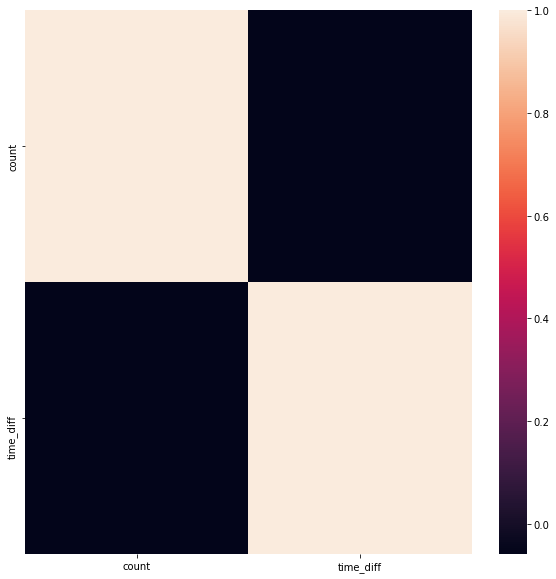

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr())

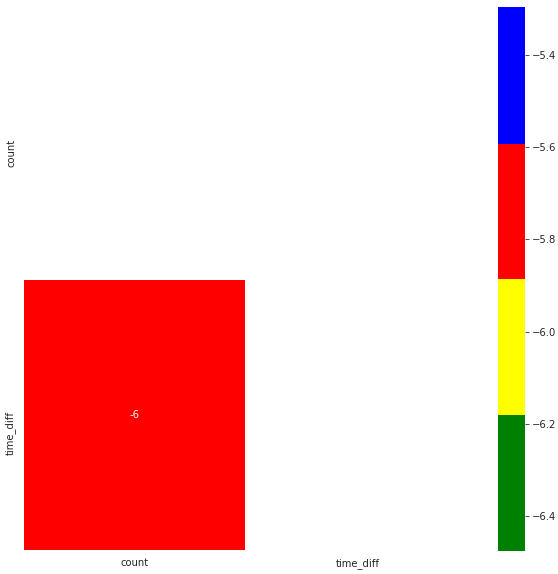

In [55]:
mask=np.zeros_like(df4.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df4.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

In [56]:
df5=df4.copy()

In [57]:
df5

,RPT_DT,ADDR_PCT_CD,count,CMPLNT_NUM,CMPLNT_FR_TM,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,...,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year_of_occurance,month_of_occurance,day_of_week,daytype,time_diff,target
4,2006-04-22,113.0,1,594816332,2020-11-10 16:10:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,PATROL BORO QUEENS SOUTH,18-24,BLACK,F,2006,4,Saturday,weekend,4,0
14,2011-01-01,69.0,1,994720437,2020-11-10 10:00:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,...,PATROL BORO BKLYN SOUTH,25-44,BLACK,F,2011,1,Saturday,weekend,1716,0
15,2011-01-01,105.0,2,484630801,2020-11-10 16:00:00,106,FELONY ASSAULT,ATTEMPTED,FELONY,N.Y. POLICE DEPT,...,PATROL BORO QUEENS SOUTH,45-64,BLACK,F,2011,1,Saturday,weekend,1718,0
16,2011-01-01,105.0,2,129890826,2020-11-10 03:00:00,359,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,PATROL BORO QUEENS SOUTH,25-44,BLACK,F,2011,1,Saturday,weekend,0,1
19,2011-01-01,42.0,1,284102197,2020-11-10 06:00:00,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,PATROL BORO BRONX,25-44,BLACK,F,2011,1,Saturday,weekend,1710,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59826,2019-02-17,67.0,1,810533252,2020-11-10 21:40:00,578,HARRASSMENT 2,COMPLETED,VIOLATION,N.Y. POLICE DEPT,...,PATROL BORO BKLYN SOUTH,25-44,BLACK,F,2019,2,Sunday,weekend,40,0
59827,2019-03-18,45.0,1,995833483,2020-11-10 15:00:00,116,SEX CRIMES,COMPLETED,FELONY,N.Y. POLICE DEPT,...,PATROL BORO BRONX,<18,WHITE HISPANIC,F,2019,3,Monday,weekday,442,0
59828,2019-03-18,66.0,1,166879036,2020-11-10 00:01:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,PATROL BORO BKLYN SOUTH,18-24,UNKNOWN,F,2019,3,Monday,weekday,445,0
59829,2019-04-08,121.0,1,327146009,2020-11-10 14:00:00,104,RAPE,COMPLETED,FELONY,N.Y. POLICE DEPT,...,PATROL BORO STATEN ISLAND,25-44,BLACK,F,2019,4,Monday,weekday,463,0


# Machine Learning Models

# Data Preparation

In [129]:
df5.dtypes

RPT_DT                int64
ADDR_PCT_CD           int64
count                 int64
CMPLNT_NUM            int64
CMPLNT_FR_TM          int64
KY_CD                 int64
OFNS_DESC             int64
CRM_ATPT_CPTD_CD      int64
LAW_CAT_CD            int64
JURIS_DESC            int64
JURISDICTION_CODE     int64
SUSP_AGE_GROUP        int64
SUSP_RACE             int64
SUSP_SEX              int64
PATROL_BORO           int64
VIC_AGE_GROUP         int64
VIC_RACE              int64
VIC_SEX               int64
year_of_occurance     int64
month_of_occurance    int64
day_of_week           int64
daytype               int64
time_diff             int32
target                int64
dtype: object

In [228]:
# Create separate object for target variable
y = df5.target

# Create separate object for input features
X = df5.drop('target', axis=1)

In [229]:
from sklearn.preprocessing import LabelEncoder

In [230]:
labelencoder = LabelEncoder()

In [231]:
df5['ADDR_PCT_CD'] = labelencoder.fit_transform(df5['ADDR_PCT_CD'])
df5['CMPLNT_NUM'] =labelencoder.fit_transform(df5['CMPLNT_NUM'])
df5['RPT_DT'] =labelencoder.fit_transform(df5['RPT_DT'])
df5['CMPLNT_FR_TM'] =labelencoder.fit_transform(df5['CMPLNT_FR_TM'])
df5['year_of_occurance'] =labelencoder.fit_transform(df5['year_of_occurance'])
df5['month_of_occurance'] =labelencoder.fit_transform(df5['month_of_occurance'])
df5['KY_CD'] =labelencoder.fit_transform(df5['KY_CD'])
df5['OFNS_DESC'] =labelencoder.fit_transform(df5['OFNS_DESC'])
df5['LAW_CAT_CD'] =labelencoder.fit_transform(df5['LAW_CAT_CD'])
df5['CRM_ATPT_CPTD_CD'] =labelencoder.fit_transform(df5['CRM_ATPT_CPTD_CD'])
df5['JURIS_DESC'] =labelencoder.fit_transform(df5['JURIS_DESC'])
df5['JURISDICTION_CODE'] =labelencoder.fit_transform(df5['JURISDICTION_CODE'])
df5['SUSP_AGE_GROUP'] =labelencoder.fit_transform(df5['SUSP_AGE_GROUP'])
df5['SUSP_SEX'] =labelencoder.fit_transform(df5['SUSP_SEX'])
df5['SUSP_RACE'] =labelencoder.fit_transform(df5['SUSP_RACE'])
df5['PATROL_BORO'] =labelencoder.fit_transform(df5['PATROL_BORO'])
df5['VIC_AGE_GROUP'] =labelencoder.fit_transform(df5['VIC_AGE_GROUP'])
df5['VIC_RACE'] =labelencoder.fit_transform(df5['VIC_RACE'])
df5['VIC_SEX'] =labelencoder.fit_transform(df5['VIC_SEX'])
df5['day_of_week'] =labelencoder.fit_transform(df5['day_of_week'])
df5['daytype'] =labelencoder.fit_transform(df5['daytype'])
df5['target'] =labelencoder.fit_transform(df5['target'])

In [232]:
df5.dtypes


RPT_DT                int64
ADDR_PCT_CD           int64
count                 int64
CMPLNT_NUM            int64
CMPLNT_FR_TM          int64
KY_CD                 int64
OFNS_DESC             int64
CRM_ATPT_CPTD_CD      int64
LAW_CAT_CD            int64
JURIS_DESC            int64
JURISDICTION_CODE     int64
SUSP_AGE_GROUP        int64
SUSP_RACE             int64
SUSP_SEX              int64
PATROL_BORO           int64
VIC_AGE_GROUP         int64
VIC_RACE              int64
VIC_SEX               int64
year_of_occurance     int64
month_of_occurance    int64
day_of_week           int64
daytype               int64
time_diff             int32
target                int64
dtype: object

In [233]:
X_train, X_test, y_train, y_test = train_test_split(df5, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(41827, 24) (41827,)
(17927, 24) (17927,)


In [234]:
X_train.describe()

,RPT_DT,ADDR_PCT_CD,count,CMPLNT_NUM,CMPLNT_FR_TM,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,...,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year_of_occurance,month_of_occurance,day_of_week,daytype,time_diff,target
count,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,...,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000,41827.000000
mean,1372.042915,40.485739,1.523944,29862.740383,792.563033,29.670811,16.036125,0.985488,1.053195,4.940278,...,2.813804,3.348101,3.624429,2.325699,5.017357,5.657159,3.013508,0.274512,3.751046,0.489875
std,622.101379,20.246377,0.789291,17210.831161,392.119420,14.476874,10.407074,0.119591,0.725261,0.670448,...,2.155061,1.033296,1.845806,0.468998,1.698398,3.439609,2.014670,0.446273,27.964223,0.499903
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,927.000000,25.000000,1.000000,14992.500000,521.000000,22.000000,6.000000,1.000000,1.000000,5.000000,...,1.000000,3.000000,2.000000,2.000000,4.000000,3.000000,1.000000,0.000000,1.000000,0.000000
50%,1501.000000,39.000000,1.000000,29784.000000,850.000000,29.000000,18.000000,1.000000,1.000000,5.000000,...,2.000000,3.000000,3.000000,2.000000,5.000000,6.000000,3.000000,0.000000,2.000000,0.000000
75%,1878.000000,58.000000,2.000000,44745.500000,1120.000000,44.000000,23.000000,1.000000,2.000000,5.000000,...,5.000000,4.000000,6.000000,3.000000,6.000000,9.000000,5.000000,1.000000,3.000000,1.000000
max,2283.000000,76.000000,7.000000,59751.000000,1419.000000,45.000000,40.000000,1.000000,2.000000,16.000000,...,7.000000,6.000000,6.000000,3.000000,9.000000,11.000000,6.000000,1.000000,1729.000000,1.000000


In [235]:
X_test.describe()

,RPT_DT,ADDR_PCT_CD,count,CMPLNT_NUM,CMPLNT_FR_TM,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,...,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year_of_occurance,month_of_occurance,day_of_week,daytype,time_diff,target
count,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,...,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000
mean,1370.575780,40.412897,1.518994,29908.603726,790.781391,29.829475,16.064428,0.986333,1.059631,4.938305,...,2.801026,3.347855,3.592681,2.319183,5.015117,5.636749,3.036481,0.279913,3.471523,0.489374
std,621.284202,20.158224,0.782824,17340.283934,392.581927,14.467944,10.384681,0.116106,0.726188,0.669700,...,2.144627,1.034191,1.842234,0.466173,1.699783,3.423039,1.998244,0.448969,22.707917,0.499901
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,926.000000,25.000000,1.000000,14779.000000,521.000000,24.000000,6.000000,1.000000,1.000000,5.000000,...,1.000000,3.000000,2.000000,2.000000,4.000000,3.000000,1.000000,0.000000,1.000000,0.000000
50%,1497.000000,39.000000,1.000000,30094.000000,845.000000,29.000000,18.000000,1.000000,1.000000,5.000000,...,2.000000,3.000000,3.000000,2.000000,5.000000,6.000000,3.000000,0.000000,2.000000,0.000000
75%,1876.000000,58.000000,2.000000,44983.000000,1120.000000,44.000000,23.000000,1.000000,2.000000,5.000000,...,5.000000,4.000000,6.000000,3.000000,6.000000,9.000000,5.000000,1.000000,3.000000,1.000000
max,2279.000000,76.000000,7.000000,59753.000000,1419.000000,45.000000,40.000000,1.000000,2.000000,16.000000,...,7.000000,6.000000,6.000000,3.000000,9.000000,11.000000,6.000000,1.000000,1728.000000,1.000000


# Data standardization

In [236]:
train_mean = X_train.mean()
train_std = X_train.std()

In [237]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [238]:
## Check for mean and std dev.
#X_train.describe()

In [239]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [240]:
## Check for mean and std dev. - not exactly 0 and 1
#X_test.describe()

# Model-1 Logistic Regresssion

In [241]:
from sklearn.metrics import classification_report,confusion_matrix

In [242]:
tuned_params = {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)
#Predict Output
predicted= model.predict(X_test)

model_score = round(model.score(X_train, y_train) * 100, 2)
model_score_test = round(model.score(X_test, y_test) * 100, 2)
print('Score: \n', model_score)
print('Test Score: \n', model_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 100.0
Test Score: 
 100.0
Accuracy: 
 1.0
[[9154    0]
 [   0 8773]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9154
           1       1.00      1.00      1.00      8773

    accuracy                           1.00     17927
   macro avg       1.00      1.00      1.00     17927
weighted avg       1.00      1.00      1.00     17927



In [74]:
model.best_estimator_

LogisticRegression(C=0.0001)

In [75]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [76]:
## Predict Test set results
y_pred = model.predict(X_test)

In [77]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [78]:
# Display first 10 predictions
y_pred_proba[:20]

array([0.20616956, 0.81628927, 0.19120774, 0.67265082, 0.23611055,
       0.73897073, 0.19779219, 0.20497025, 0.18626467, 0.72699444,
       0.2277929 , 0.25339793, 0.78335338, 0.80321864, 0.77458087,
       0.2376201 , 0.77079495, 0.3127085 , 0.24445507, 0.71581219])

In [79]:
i=28  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 1, precited class = 1, predicted probability = 0.7343832038466747


In [80]:
confusion_matrix(y_test, y_pred).T

array([[9111,    0],
       [   6, 8810]], dtype=int64)

In [81]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

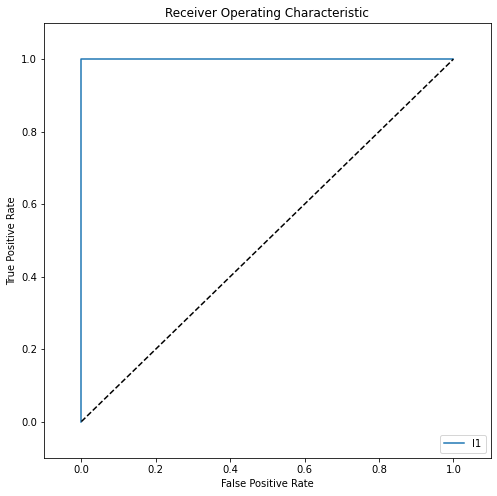

In [82]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.9996958922054833


In [84]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

1.0


In [85]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


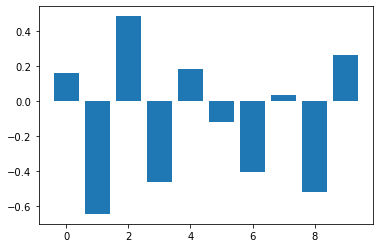

In [86]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Note that both positive and negative are the coefficients. The positive scores show a function that predicts class 1, while the negative scores show a function that predicts class 0.

From these outcomes, at least from what I can say, no consistent trend of significant and unimportant features can be established.
A bar chart is then created for the feature importance scores.

# Model-2 Random Forest 

In [87]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [88]:
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

model_score = round(model.score(X_train, y_train) * 100, 2)
model_score_test = round(model.score(X_test, y_test) * 100, 2)
print('Score: \n', model_score)
print('Test Score: \n', model_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 100.0
Test Score: 
 100.0
Accuracy: 
 1.0
[[9117    0]
 [   0 8810]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9117
           1       1.00      1.00      1.00      8810

    accuracy                           1.00     17927
   macro avg       1.00      1.00      1.00     17927
weighted avg       1.00      1.00      1.00     17927



In [89]:
model.best_estimator_

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400)

In [90]:
y_train_pred = model.predict(X_train)

In [91]:
y_pred = model.predict(X_test)

In [92]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [93]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.0015    , 0.99925   , 0.00264583, 0.99469231, 0.        ,
       0.99903846, 0.00357143, 0.00176471, 0.00213675, 0.98577489])

In [94]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

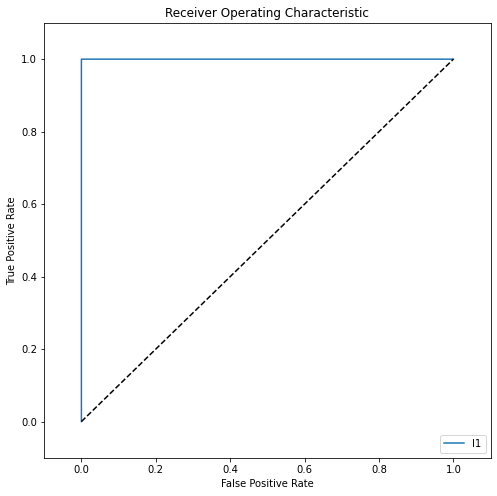

In [95]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [96]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

1.0

In [97]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9999999999999999


In [98]:

## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

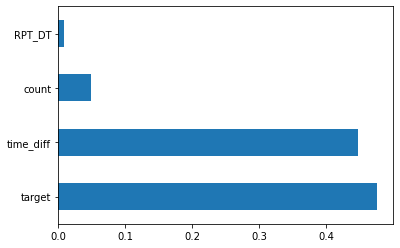

In [99]:
feat_importances = pd.Series(model.feature_importances_, index=df5.columns)
feat_importances.nlargest(4).plot(kind='barh')


# Model-3 XGBoost

In [100]:
from xgboost import XGBClassifier

In [102]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

model_score = round(model.score(X_train, y_train) * 100, 2)
model_score_test = round(model.score(X_test, y_test) * 100, 2)
print('Score: \n', model_score)
print('Test Score: \n', model_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 100.0
Test Score: 
 100.0
Accuracy: 
 1.0
[[9117    0]
 [   0 8810]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9117
           1       1.00      1.00      1.00      8810

    accuracy                           1.00     17927
   macro avg       1.00      1.00      1.00     17927
weighted avg       1.00      1.00      1.00     17927



In [103]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
y_train_pred = model.predict(X_train)

In [163]:
y_pred = model.predict(X_test)

In [164]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [165]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.32687088, 0.69624635, 0.17721446, 0.25707013, 0.24145288,
       0.20836388, 0.73553066, 0.78400433, 0.77810519, 0.22796146])

In [166]:
confusion_matrix(y_test, y_pred).T

array([[9026,    0],
       [   7, 8894]], dtype=int64)

In [167]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

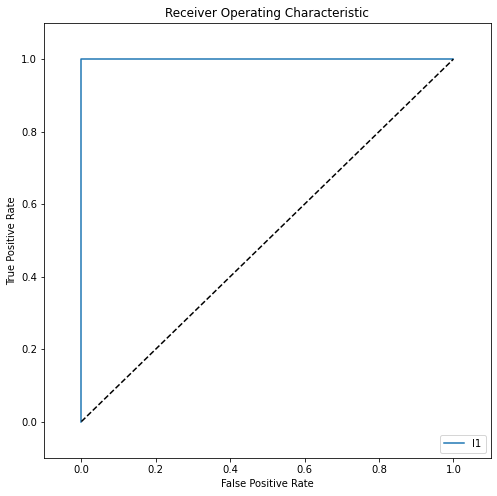

In [168]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [169]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.9997669866716375

In [170]:
# Calculate AUC for Test
print(auc(fpr, tpr))

1.0


In [171]:
model = XGBClassifier(max_depth=2,learning_rate=0.05,n_estimators=500, reg_lambda=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

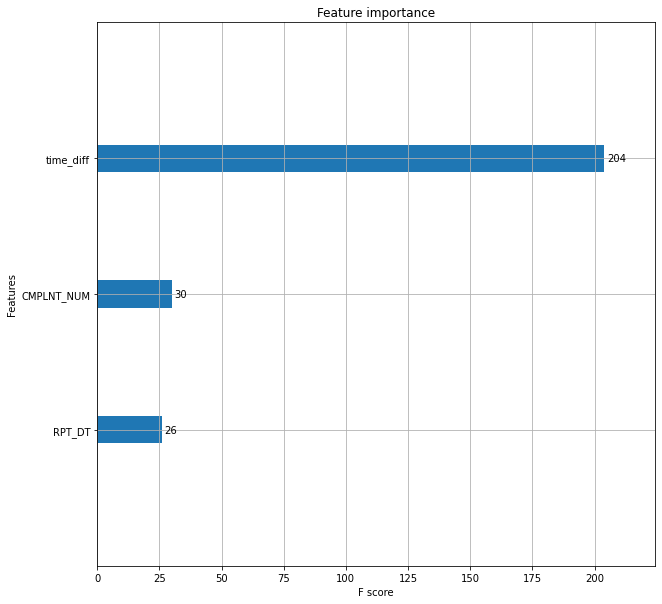

In [173]:
my_plot_importance(model, (10,10))

# Model-4 KNN

In [174]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

#Predict Output
predicted= model.predict(X_test)

model_score = round(model.score(X_train, y_train) * 100, 2)
model_score_test = round(model.score(X_test, y_test) * 100, 2)
print('Score: \n', model_score)
print('Test Score: \n', model_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))


The optimal number of neighbors is 19.
Score: 
 100.0
Test Score: 
 100.0
Accuracy: 
 1.0
[[9033    0]
 [   0 8894]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9033
           1       1.00      1.00      1.00      8894

    accuracy                           1.00     17927
   macro avg       1.00      1.00      1.00     17927
weighted avg       1.00      1.00      1.00     17927



In [175]:
MSE.index(min(MSE))

9

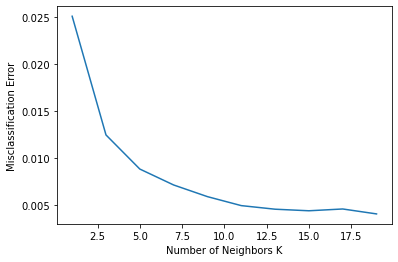

In [176]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [177]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [178]:
y_pred = classifier.predict(X_test)

In [179]:
y_train_pred = classifier.predict(X_train)

In [181]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

99.65973113181235

In [182]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[8991,   19],
       [  42, 8875]], dtype=int64)

In [183]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [184]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.26315789, 0.78947368, 0.        , 0.        , 0.        ,
       0.        , 0.63157895, 1.        , 0.94736842, 0.        ])

In [185]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

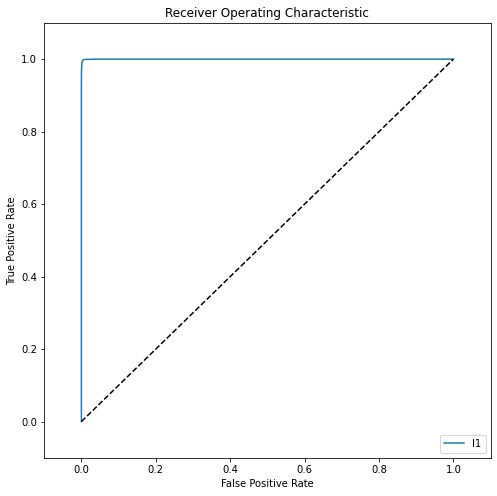

In [186]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [187]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.9974764904777798

In [188]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9999284971918297


# Model-5 Descision Trees

In [189]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

model_score = round(model.score(X_train, y_train) * 100, 2)
model_score_test = round(model.score(X_test, y_test) * 100, 2)
print('Score: \n', model_score)
print('Test Score: \n', model_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 100.0
Test Score: 
 100.0
Accuracy: 
 1.0
[[9033    0]
 [   0 8894]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9033
           1       1.00      1.00      1.00      8894

    accuracy                           1.00     17927
   macro avg       1.00      1.00      1.00     17927
weighted avg       1.00      1.00      1.00     17927



In [190]:
model.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4)

In [191]:
y_train_pred = model.predict(X_train)

In [192]:
y_pred = model.predict(X_test)

In [193]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [194]:
y_pred_proba[:10]

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0.])

In [195]:
confusion_matrix(y_test, y_pred).T

array([[9033,    0],
       [   0, 8894]], dtype=int64)

In [196]:
confusion_matrix(y_test, y_pred).T

array([[9033,    0],
       [   0, 8894]], dtype=int64)

In [197]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

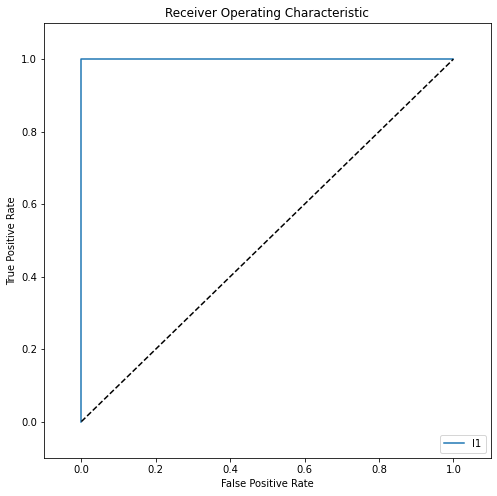

In [198]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [199]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

1.0

In [200]:
print(auc(fpr, tpr))

1.0


In [201]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

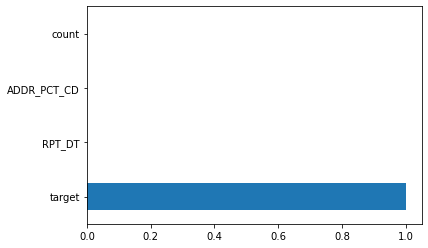

In [202]:
feat_importances = pd.Series(model.feature_importances_, index=df5.columns)
feat_importances.nlargest(4).plot(kind='barh')

Feature: 0, Score: 0.45619
Feature: 1, Score: 0.04764
Feature: 2, Score: 0.08236
Feature: 3, Score: 0.00109
Feature: 4, Score: 0.39992
Feature: 5, Score: 0.00118
Feature: 6, Score: 0.00121
Feature: 7, Score: 0.00145
Feature: 8, Score: 0.00155
Feature: 9, Score: 0.00112
Feature: 10, Score: 0.00133
Feature: 11, Score: 0.00161
Feature: 12, Score: 0.00110
Feature: 13, Score: 0.00125
Feature: 14, Score: 0.00101


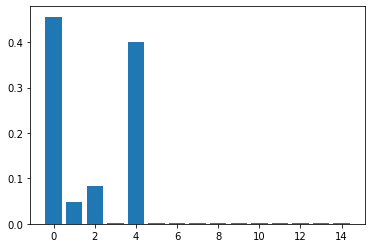

In [203]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=10000, n_features=15, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()